Testing our data against DenseNet Model 

Implicating changes within the data with cutmix

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/
%ls

In [ ]:
!pip install fastai
!pip install pydicom
!pip install kornia

In [ ]:
from fastai.vision.all import *
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pydicom
import glob
import pandas as pd
import seaborn as sns
from fastai.medical.imaging import *

In [ ]:
fn = get_image_files('rsna-data/train_jpg/train_jpg/')
img = PILImage.create(fn[13], mode = 'L')
img

In [ ]:
len(fn)

194082

In [ ]:
labels = pd.read_csv('label.csv')
multi_labels = pd.read_csv('multi_labels.csv')
updated_multi_labels = pd.read_csv('updated_multi_labels.csv')

In [ ]:
labels = labels.iloc[:,0:2]
labels.head()

,ID,any
0,ID_000039fa0,0
1,ID_00005679d,0
2,ID_00008ce3c,0
3,ID_0000950d7,0
4,ID_0000aee4b,0


In [ ]:
labels['ID'] = labels['ID'] + '.jpg'

In [ ]:
def show_batch(x, nrows = 5, ncols = 5, title = None):
    """
    Read a list of images, and display them
    """
    fig=plt.figure(figsize=(9, 9))
    if title: plt.title(title)
    for i in range(1, ncols*nrows +1):
        ds = x[i]
        fig.add_subplot(nrows, ncols, i)
        plt.imshow(ds, cmap=plt.cm.bone)
        fig.add_subplot

In [ ]:
updated_multi_labels.columns

Index(['ID', 'any', 'epidural', 'intraparenchymal', 'intraventricular',
       'subarachnoid', 'subdural', 'multi'],
      dtype='object')

In [ ]:
updated_multi_labels = updated_multi_labels.drop(['any', 'epidural', 'intraparenchymal', 'intraventricular',
       'subarachnoid', 'subdural'], axis = 1)
updated_multi_labels.head()

,ID,multi
0,ID_000039fa0,NaN
1,ID_00005679d,NaN
2,ID_00008ce3c,NaN
3,ID_0000950d7,NaN
4,ID_0000aee4b,NaN


In [ ]:
tfms = L([FlipItem(p = 0.2)])

In [ ]:
updated_multi_labels['ID'] = updated_multi_labels['ID'] + '.jpg'

In [ ]:
file_list_multi = os.listdir('train_jpg/train_jpg')
# Filter the DataFrame to include only files that exist in the directory
updated_multi_labels = updated_multi_labels[updated_multi_labels['ID'].isin(file_list_multi)]

In [ ]:
display(updated_multi_labels)

,ID,multi
2,ID_00008ce3c.jpg,NaN
4,ID_0000aee4b.jpg,NaN
11,ID_0002003a8.jpg,NaN
12,ID_0002081b6.jpg,intraparenchymal
19,ID_00027cbb1.jpg,NaN
...,...,...
674236,ID_fffd8342d.jpg,NaN
674250,ID_ffff53123.jpg,NaN
674253,ID_ffff73ede.jpg,NaN
674254,ID_ffff80705.jpg,NaN


In [ ]:
updated_multi_labels = updated_multi_labels.dropna(subset=['multi'])

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
display(updated_multi_labels)


Cleaned DataFrame:


,ID,multi
12,ID_0002081b6.jpg,intraparenchymal
21,ID_0002a38ad.jpg,subarachnoid;subdural
28,ID_000346ce2.jpg,subdural
31,ID_00042829c.jpg,intraventricular
37,ID_0004a5701.jpg,subdural
...,...,...
674203,ID_fffb124e6.jpg,subarachnoid;subdural
674204,ID_fffb16e96.jpg,subdural
674217,ID_fffc60817.jpg,intraparenchymal;intraventricular
674229,ID_fffd00949.jpg,subarachnoid


Checking access to our smaller batch

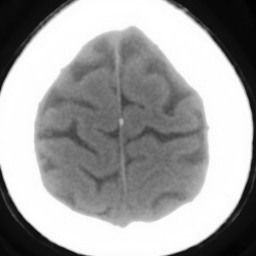

In [ ]:
fn_batch = get_image_files('batch/')
img = PILImage.create(fn_batch[13], mode = 'L')
img

We now need to create new csvs to correspond with the shorter amount of data found within this new folder we created

In [ ]:
file_list_batch = os.listdir('batch/')
# Filter the DataFrame to include only files that exist in the directory
batch_multi_labels = updated_multi_labels[updated_multi_labels['ID'].isin(file_list_batch)]

In [ ]:
#subdural_data = batch_multi_labels[batch_multi_labels['multi'].str.contains('subdural')]
#display(subdural_data)

In [ ]:
#intraparenchymal_data = batch_multi_labels[batch_multi_labels['multi'].str.contains('intraparenchymal')]
#display(intraparenchymal_data)

In [ ]:
#subarachnoid_data = batch_multi_labels[batch_multi_labels['multi'].str.contains('subarachnoid')]
#display(subarachnoid_data)

In [ ]:
#intraventricular_data = batch_multi_labels[batch_multi_labels['multi'].str.contains('intraventricular')]
#display(intraventricular_data)

In [ ]:
#epidural_data = batch_multi_labels[batch_multi_labels['multi'].str.contains('epidural')]
#display(epidural_data)

In [ ]:
display(batch_multi_labels)

,ID,multi
32262,ID_0c3a90a5b.jpg,intraparenchymal
32266,ID_0c3b61e10.jpg,subdural
32275,ID_0c3c2e029.jpg,subarachnoid;subdural
32289,ID_0c3d7651d.jpg,intraparenchymal
32301,ID_0c3dfd95f.jpg,subarachnoid
...,...,...
35364,ID_0d6b174cf.jpg,subdural
35368,ID_0d6bbb7d4.jpg,subdural
35374,ID_0d6c0d346.jpg,subdural
35391,ID_0d6d4ba9f.jpg,intraventricular;subarachnoid;subdural


In [ ]:
tfms = L([FlipItem(p = 0.2)])

In [ ]:
dls_batch = ImageDataLoaders.from_df(batch_multi_labels, 'batch', label_delim=';', batch_tfms=tfms, seed = 42)

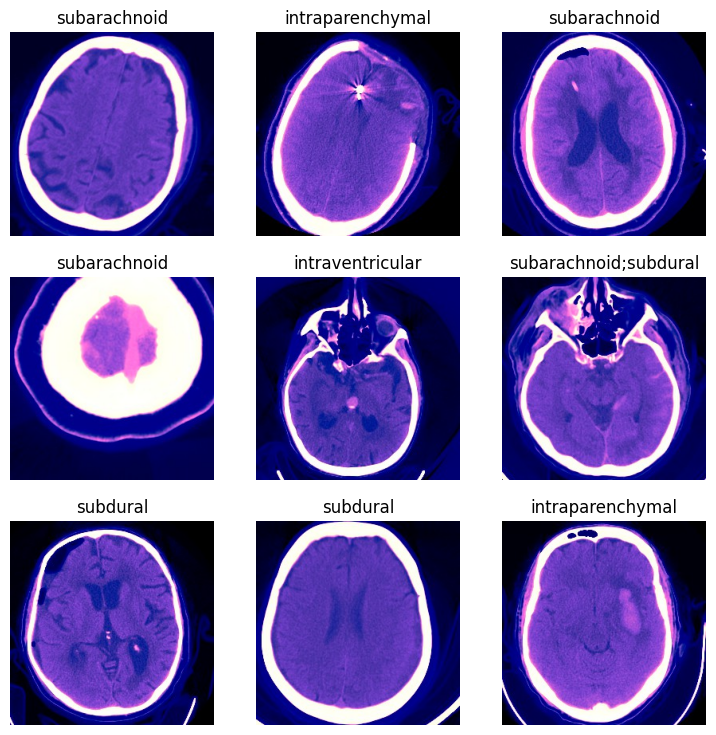

In [ ]:
dls_batch.show_batch()

Great! Now we have our subset of data, lets see of how much classifcation is in each

<ipython-input-27-c7c313e56b25>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=batch_label_counts.index, x=batch_label_counts.values, palette="deep",


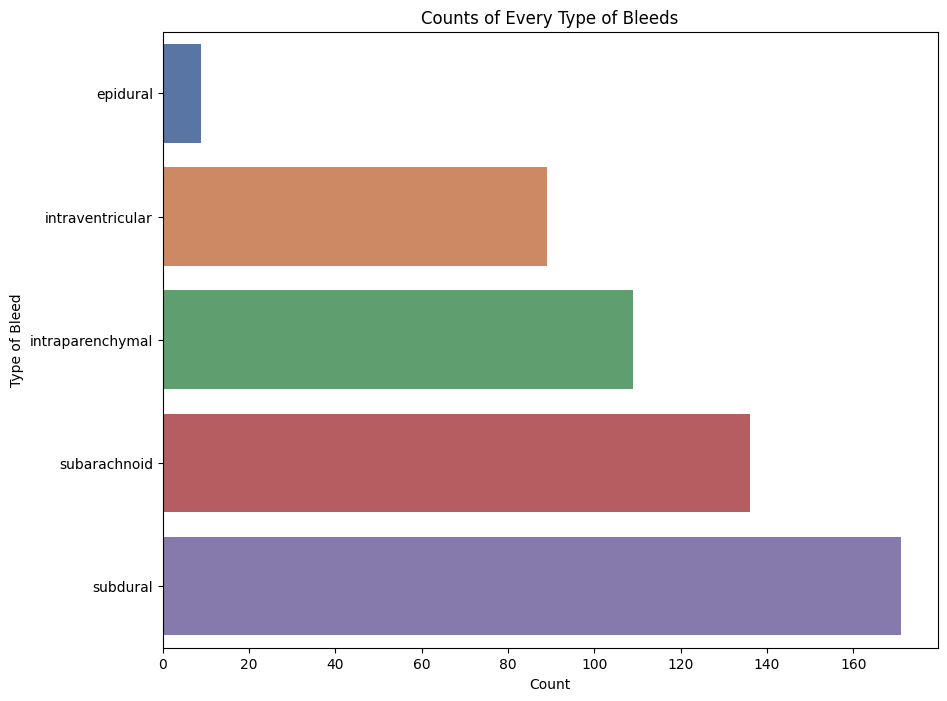

In [ ]:
batch_all_labels_indiv = batch_multi_labels['multi'].str.split(';').explode()

# Count each type of label
batch_label_counts = batch_all_labels_indiv.value_counts()

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(y=batch_label_counts.index, x=batch_label_counts.values, palette="deep",
            order=batch_label_counts.index[::-1])  # This reverses the order
plt.title("Counts of Every Type of Bleeds")
plt.xlabel("Count")
plt.ylabel("Type of Bleed")
plt.show()


In [ ]:
learn_densenet_simple = vision_learner(dls_batch_simple2, densenet121, metrics=accuracy)

In [ ]:
learn_densenet_simple.fit_one_cycle(2, 0.002511886414140463)

epoch,train_loss,valid_loss,accuracy,time
0,0.878568,0.614177,0.736667,12:53
1,0.641335,0.471099,0.786667,12:33


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
%cd rsna-data

/content/drive/MyDrive/rsna-data


Introducing CutMix

We need to create a new folder which will hold ouir new spliced images

In [ ]:
new_folder_name = 'cutmix'

# Create the new directory in the current working directory
new_folder_path = os.path.join(os.getcwd(), new_folder_name)
os.makedirs(new_folder_path, exist_ok=True)

Implementing Cutmix

In [ ]:
import os
import random
from PIL import Image

def cutmix_image(source_folder, destination_folder, alpha=1.0):
    # Ensure the destination folder exists
    os.makedirs(destination_folder, exist_ok=True)

    # List all images in the source folder
    images = [os.path.join(source_folder, f) for f in os.listdir(source_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    total_images = len(images)

    for idx, image_path in enumerate(images):
        # Open the base image
        img1 = Image.open(image_path)
        # Randomly select another image
        img2 = Image.open(random.choice(images))

        # Generate a random rectangular mask
        width, height = img1.size
        rx, ry = random.randrange(0, width), random.randrange(0, height)
        rw, rh = int(random.gauss(width / 2, width / alpha)), int(random.gauss(height / 2, height / alpha))
        rw, rh = max(1, min(rw, width - rx)), max(1, min(rh, height - ry))

        # Create a new image by blending img1 and the patch from img2
        patch = img2.crop((rx, ry, rx + rw, ry + rh))
        img1.paste(patch, (rx, ry))

        # Save the new image with the same original name in the destination folder
        original_name = os.path.basename(image_path)
        img1.save(os.path.join(destination_folder, original_name))

        # Print progress
        print(f'Processed {idx + 1}/{total_images} images.')

source_folder = 'batch'
destination_folder = 'cutmix'
cutmix_image(source_folder, destination_folder)

In [ ]:
dls_batch_simple_cutmix = ImageDataLoaders.from_df(batch_labels, 'cutmix', batch_size=8, batch_tfms=tfms, seed = 42)

In [ ]:
learn_densenet_cutmix = vision_learner(dls_batch_simple_cutmix, densenet121, metrics=accuracy)

In [ ]:
learn_densenet_cutmix.fit_one_cycle(2, 0.002511886414140463)

epoch,train_loss,valid_loss,accuracy,time
0,0.743620,0.510875,0.726667,12:24
1,0.540349,0.478400,0.753333,12:39


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
